In [1]:
from scipy.stats import lognorm, describe

In [46]:
mean = 0.1
sigma = 1.41
m, v  = lognorm.stats(sigma, moments="mv")
ratio = mean/m
stddev = v**0.5 * ratio
results = ratio*lognorm.rvs(sigma, size=10000)
description = describe(results)
if abs(mean - description.mean)/mean > 0.1:
    raise ValueError("sampled distribution not as expected", mean, description.mean)
if abs(stddev - description.variance**0.5)/stddev > 0.1:
    raise ValueError("sampled distribution not as expected", stddev, description.variance**0.5)
results.sort()
p90_idx = int(len(results) * 0.9)
p99_idx = int(len(results) * 0.99)
print(f"Mean: {mean} Stddev: {round(stddev, 2)} P90:{results[p90_idx]} P99:{results[p99_idx]}")
print(f"Sigmas over mean: {round((results[p99_idx]-mean)/stddev, 2)}")

Mean: 0.1 Stddev: 0.25 P90:0.23305090270361384 P99:1.1186567535592287
Sigmas over mean: 4.06


This like going to a party with 100 people randomly selected from US population, and meeting someone who's 6'9"!

The lognormal distribution has a fat tail that can cause you a lot of pain!

In [6]:
results = lognorm.pdf(range(1, 101), 1.41)

In [48]:
client = httpx.Client(timeout=None)

Our **backend** is lognormal. What about our middle service?

In [ ]:
values = []
for i in range(100):
    value = client.get("http://localhost:5000").json()
    values.append(value)

In [77]:
totals = [x['total'] for x in values]
totals.sort()
description = describe(totals)
print("If we look at mean, variance and p90, we look good: ", description.mean, description.variance**0.5, totals[90])
print("If we look at P95 and P99...", totals[95], totals[99])

If we look at mean, variance and p90, we look good:  0.30021350682914516 0.21811535000528137 0.537709824510733
If we look at P95 and P99... 0.8219867784591958 1.266870092270889


In [7]:
import matplotlib

In [19]:
import matplotlib.pyplot as plt
import numpy as np

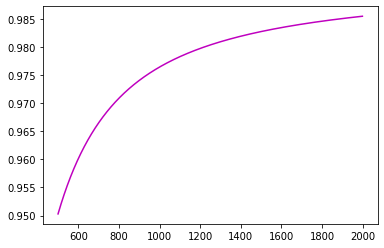

In [57]:
x = range(500, 2000)
y = lognorm.pdf(x, 2)
z = np.array(0.001)/x
t = z ** 0.7 #*z
h = (t-y)/(t+z)

plt.plot(x, h, "m")[0]

## %matplotlib inline

In [14]:
help(matplotlib)

Help on package matplotlib:

NAME
    matplotlib - An object-oriented plotting library.

DESCRIPTION
    A procedural interface is provided by the companion pyplot module,
    which may be imported directly, e.g.::
    
        import matplotlib.pyplot as plt
    
    or using ipython::
    
        ipython
    
    at your terminal, followed by::
    
        In [1]: %matplotlib
        In [2]: import matplotlib.pyplot as plt
    
    at the ipython shell prompt.
    
    For the most part, direct use of the object-oriented library is encouraged when
    programming; pyplot is primarily for working interactively.  The exceptions are
    the pyplot functions `.pyplot.figure`, `.pyplot.subplot`, `.pyplot.subplots`,
    and `.pyplot.savefig`, which can greatly simplify scripting.
    
    Modules include:
    
        :mod:`matplotlib.axes`
            The `~.axes.Axes` class.  Most pyplot functions are wrappers for
            `~.axes.Axes` methods.  The axes module is the highest level